In [16]:
import numpy as np
import pandas
import sklearn
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
import imblearn

In [17]:
#read the file into a dataframe

data = pandas.read_csv('SeoulBikeData.csv', encoding='ISO-8859-1')

In [18]:
from sklearn.preprocessing import LabelEncoder

# encode the categorical data to contineous
encoder = LabelEncoder()
data['Seasons_encoded'] = encoder.fit_transform(data['Seasons'])
data['Holiday_encoded'] = encoder.fit_transform(data['Holiday'])
data['Functioning_Day_encoded'] = encoder.fit_transform(data['Functioning Day'])
data['Date'] = pandas.to_datetime(data['Date'], format="%d/%m/%Y")


In [19]:
print(data.head(10))

        Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)   
0 2017-12-01                254     0             -5.2           37  \
1 2017-12-01                204     1             -5.5           38   
2 2017-12-01                173     2             -6.0           39   
3 2017-12-01                107     3             -6.2           40   
4 2017-12-01                 78     4             -6.0           36   
5 2017-12-01                100     5             -6.4           37   
6 2017-12-01                181     6             -6.6           35   
7 2017-12-01                460     7             -7.4           38   
8 2017-12-01                930     8             -7.6           37   
9 2017-12-01                490     9             -6.5           27   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)   
0               2.2              2000                      -17.6  \
1               0.8              2000                      -17.6   
2             

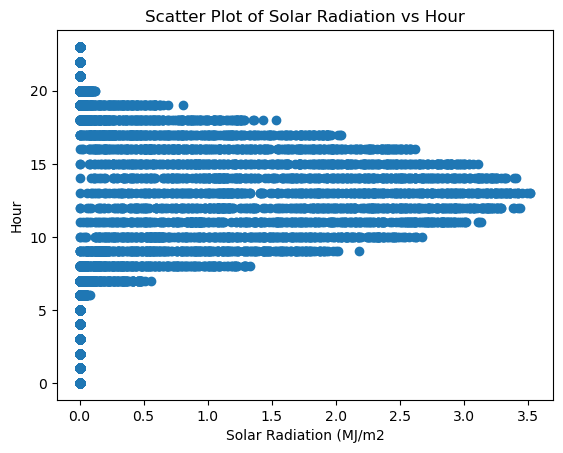

In [20]:
# I believe (solar radiation + hour) and (date + season) are correlated to each other

plt.scatter(data['Solar Radiation (MJ/m2)'], data['Hour'])
plt.title('Scatter Plot of Solar Radiation vs Hour')
plt.xlabel('Solar Radiation (MJ/m2')
plt.ylabel('Hour')
plt.show()

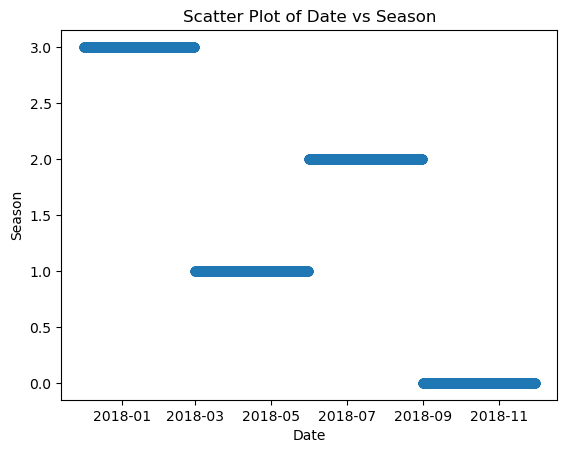

In [21]:
plt.scatter(data['Date'], data['Seasons_encoded'])
plt.title('Scatter Plot of Date vs Season')
plt.xlabel('Date')
plt.ylabel('Season')
plt.show()

In [1]:
# Confirmed these two sets of features are correlated due to the patterns seen

Text(0, 0.5, 'Bike Rental Count')

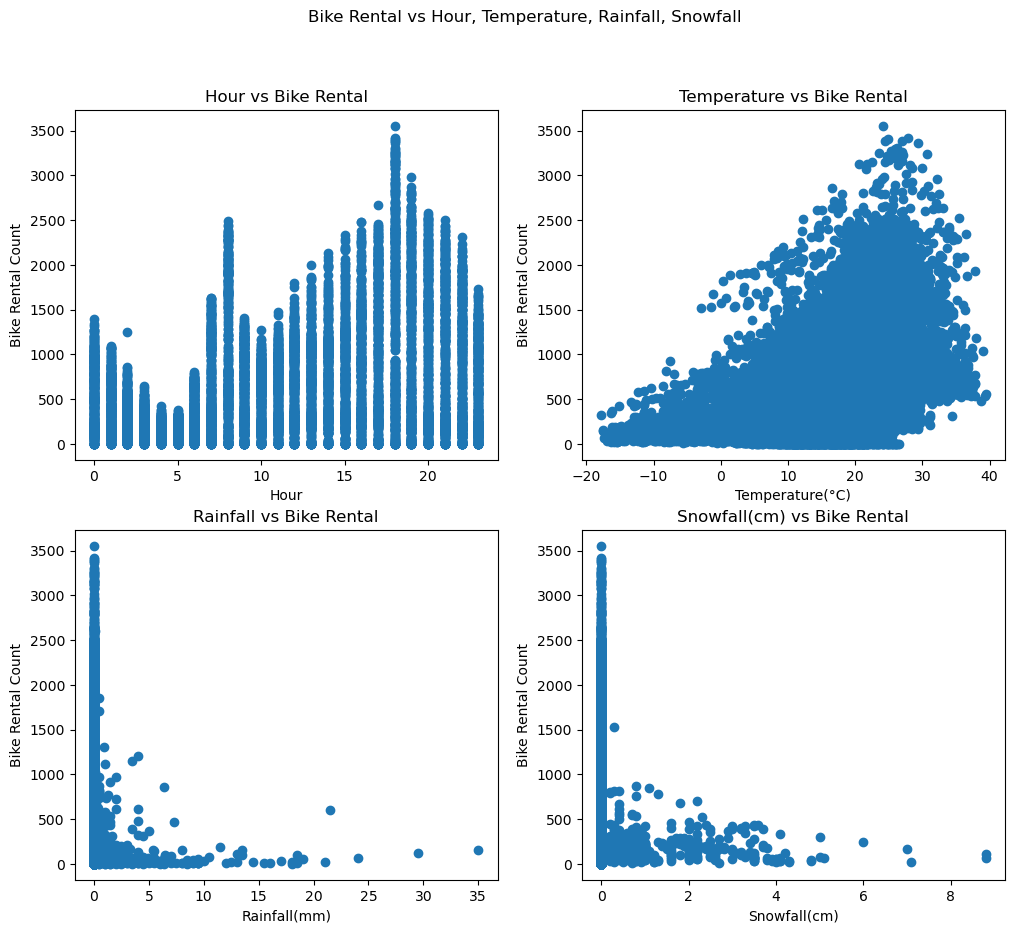

In [22]:
# I think hour, temperature, rainfall and snow fall are correlated to bike rental.

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
fig.suptitle('Bike Rental vs Hour, Temperature, Rainfall, Snowfall')

# Plot against hour
axs[0, 0].scatter(data['Hour'], data['Rented Bike Count'])
axs[0, 0].set_title('Hour vs Bike Rental')
axs[0, 0].set_xlabel('Hour')
axs[0, 0].set_ylabel('Bike Rental Count')

# Plot against temperature
axs[0, 1].scatter(data['Temperature(°C)'], data['Rented Bike Count'])
axs[0, 1].set_title('Temperature vs Bike Rental')
axs[0, 1].set_xlabel('Temperature(°C)')
axs[0, 1].set_ylabel('Bike Rental Count')

# Plot against rainfall
axs[1, 0].scatter(data['Rainfall(mm)'], data['Rented Bike Count'])
axs[1, 0].set_title('Rainfall vs Bike Rental')
axs[1, 0].set_xlabel('Rainfall(mm)')
axs[1, 0].set_ylabel('Bike Rental Count')

# Plot against snowfall
axs[1, 1].scatter(data['Snowfall (cm)'], data['Rented Bike Count'])
axs[1, 1].set_title('Snowfall(cm) vs Bike Rental')
axs[1, 1].set_xlabel('Snowfall(cm)')
axs[1, 1].set_ylabel('Bike Rental Count')

In [2]:
# Confirmed that all of these features are correlated to bike rental due to the patterns shown. 

In [23]:
from sklearn.model_selection import train_test_split

# Convert timestamp to Unix time in seconds and store as float
data['Date_float'] = data['Date'].astype('int64') // 10**9
data = data.drop(['Date', 'Seasons', 'Holiday', 'Functioning Day'], axis=1)

#Set up features and target variables
X = data.drop('Rented Bike Count', axis=1)
y = data['Rented Bike Count']

#Split train set
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2)

#Split remaining to test and validation sets
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5)

In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

#linear regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

#linear predict
linear_pred = linear_model.predict(X_test)

#Check MSE and R2 for Linear pred
mse_linear = mean_squared_error(y_test, linear_pred)
r2_linear = r2_score(y_test, linear_pred)

print(f'Mean Squared Error (Linear Regression): {mse_linear}')
print(f'R-squared (Linear Regression) Score: {r2_linear}')

Mean Squared Error (Linear Regression): 185845.30382355186
R-squared (Linear Regression) Score: 0.5531229354194767


In [30]:
#Random Forest regression model
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

#linear predict
rf_pred = rf_model.predict(X_test)

#Check MSE and R2 for Linear pred
mse_rf = mean_squared_error(y_test, rf_pred)
r2_rf = r2_score(y_test, rf_pred)

print(f'Mean Squared Error (RF Regression): {mse_rf}')
print(f'R-squared (RF Regression) Score: {r2_rf}')

Mean Squared Error (RF Regression): 42804.42091860731
R-squared (RF Regression) Score: 0.8970739987633076


In [ ]:
# The linear regression model has a high MSE, indicating a larger average squared difference between predicted and actual values. 
# The linear regression model struggles to capture the underlying patterns in the data. 
# It could be that the relationship between the features and the target variable is not well approximated by a linear function.
# The R2 score of 0.553 suggests that the linear regression model explains approximately 55.3% of the variability in the target variable.
# The Random Forest Regression model has a significantly lower MSE compared to linear regression, indicating smaller errors in prediction.
# Random Forest models, being more flexible and capable of capturing non-linear relationships, tend to perform well on a variety of datasets.
# The R2 score of 0.897 suggests that the Random Forest model explains approximately 89.7% of the variability in the target variable.
# The high R2 score indicates that the Random Forest model captures a substantial portion of the variance and provides a strong fit to the data.
# In conclusion, the Random Forest Regression method outperforms the Linear Regression method on the provided dataset, likely due to its ability to capture complex non-linear relationships. 